In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [6]:
# Load data
lefse = pd.read_csv('lefse_de_output.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)

# lefse = lefse.sort_values(by='LDAscore', ascending=True)
# lefse  = lefse.sort_values(by='LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse

,Feature,Pvalues,FDR,C,F,LDAscore,abs_LDAscore
19,Lactobacillus,2.574300e-07,8.581000e-07,6811500.0,1876300.0,6.39,6.39
47,Escherichia_Shigella,5.965400e-05,8.522000e-05,2565400.0,6371800.0,-6.28,6.28
64,Muribacter,9.691000e-03,1.027800e-02,106020.0,397560.0,-5.16,5.16
54,Staphylococcus,3.393400e-04,4.241800e-04,48799.0,267450.0,-5.04,5.04
38,Streptococcus,1.151200e-05,2.014700e-05,307780.0,92611.0,5.03,5.03
6,Lachnospiraceae_NK4A136_group,1.820200e-08,1.592700e-07,8669.6,53132.0,-4.35,4.35
1,Phyllobacterium,9.334800e-09,1.592700e-07,8387.0,51250.0,-4.33,4.33
16,Aeromonas,1.239500e-07,4.820300e-07,10119.0,51235.0,-4.31,4.31
3,Alloprevotella,1.607000e-08,1.592700e-07,8496.3,40412.0,-4.20,4.20
2,Alistipes,1.187800e-08,1.592700e-07,4840.7,34087.0,-4.17,4.17


In [7]:
# Specify the columns to consider for finding the max
columns_to_check = ['C', 'F']
# Find the column with the maximum value for each row
lefse['Response'] = lefse[columns_to_check].idxmax(axis=1)
lefse


,Feature,Pvalues,FDR,C,F,LDAscore,abs_LDAscore,Response
19,Lactobacillus,2.574300e-07,8.581000e-07,6811500.0,1876300.0,6.39,6.39,C
47,Escherichia_Shigella,5.965400e-05,8.522000e-05,2565400.0,6371800.0,-6.28,6.28,F
64,Muribacter,9.691000e-03,1.027800e-02,106020.0,397560.0,-5.16,5.16,F
54,Staphylococcus,3.393400e-04,4.241800e-04,48799.0,267450.0,-5.04,5.04,F
38,Streptococcus,1.151200e-05,2.014700e-05,307780.0,92611.0,5.03,5.03,C
6,Lachnospiraceae_NK4A136_group,1.820200e-08,1.592700e-07,8669.6,53132.0,-4.35,4.35,F
1,Phyllobacterium,9.334800e-09,1.592700e-07,8387.0,51250.0,-4.33,4.33,F
16,Aeromonas,1.239500e-07,4.820300e-07,10119.0,51235.0,-4.31,4.31,F
3,Alloprevotella,1.607000e-08,1.592700e-07,8496.3,40412.0,-4.20,4.20,F
2,Alistipes,1.187800e-08,1.592700e-07,4840.7,34087.0,-4.17,4.17,F


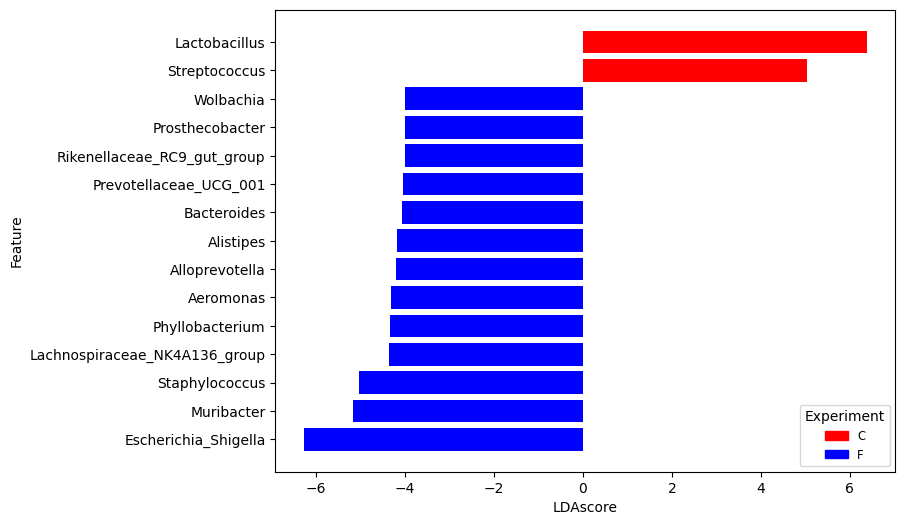

In [9]:
lefse = lefse.sort_values(by='LDAscore', ascending=True)
colors = lefse['Response'].map({'C': 'red', 'F': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse['Feature'], lefse['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Feature')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='C')
blue_patch = mpatches.Patch(color='blue', label='F')
plt.legend(handles=[red_patch, blue_patch ], title='Experiment', loc='lower right',fontsize='small')

plt.show()